<a href="https://colab.research.google.com/github/ajaythakur3369/CodeClauseInternship_ProjectName/blob/main/Task_2_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Gold Price Prediction**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - CodeClause Pvt. Ltd.**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CodeClauseInternship_ProjectName)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1m3PESWW7ypXwHmNjL1Dh3i13mlpeWAWi)**

## **1. Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## **2. Data Collection and Processing**

In [ ]:
# Access the Drive from Colab, for accessing required file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Path, for accessing required file from Drive
gold_data = pd.read_csv('/content/drive/MyDrive/folders/gold_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# Getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## **3. Correlation**

1.   Positive Correlation
2.   Negative Correlation



In [ ]:
correlation = gold_data.corr()

<ipython-input-10-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

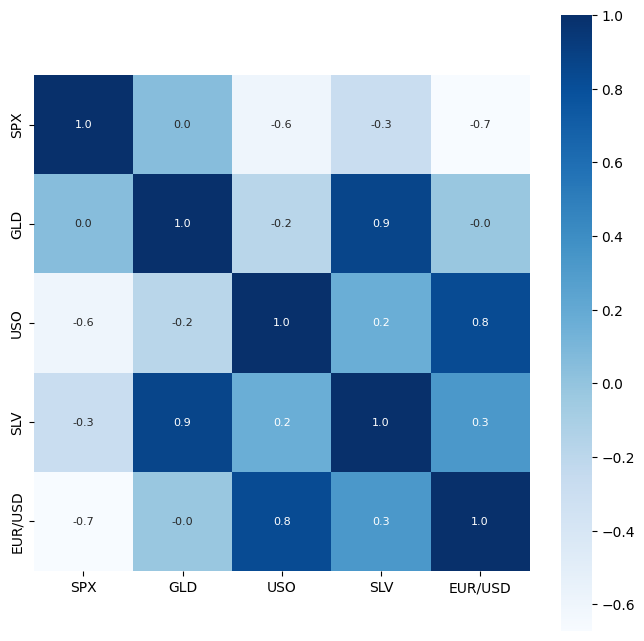

In [ ]:
# Constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-13-a513e18f340c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')# checking the distribution of the GLD Price
<ipython-input-13-a513e18f340c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

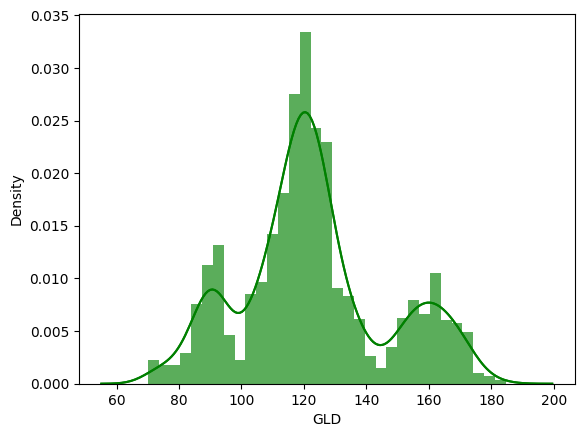

In [ ]:
# Checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

## **4. Splitting the Features and Target**

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## **5. Splitting the data into trainig and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## **6. Model Training: Random Forest Regressor**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## **7. Model Evalution**

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.10659931  82.00049993 115.76099982 127.68930048 120.60300116
 154.74129743 150.24219786 126.12990026 117.3677985  125.95410135
 116.44870111 171.65390062 141.93259831 167.48329819 115.2117005
 117.52770054 139.69720263 170.43090151 159.73660273 157.37919869
 154.97770011 125.29450024 175.32889964 156.71110308 125.27460009
  93.61869972  77.26180031 120.63719994 119.14019946 167.47050033
  88.24080014 125.39220026  91.12280058 117.64320042 121.12799929
 136.12980076 115.33530128 115.08130063 148.90659959 107.14210098
 104.70670238  87.06719765 126.53970046 117.90539987 153.50399887
 119.6172002  108.43090003 108.1906984   93.14410091 127.12179796
  74.59430032 113.68239933 121.37009984 111.1110991  118.8834989
 120.8687994  159.45580056 169.14810119 146.94799664  85.8196988
  94.46810062  86.82209859  90.60460047 119.11940061 126.549301
 127.62869981 170.40330056 122.26659928 117.63649893  98.36290014
 168.64980151 143.28309868 131.51570248 121.21670192 121.69309913
 119.81320048 1

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9885959490902594


## **8. Compare the Actual values and Predicted values in a plot**

In [ ]:
Y_test = list(Y_test)

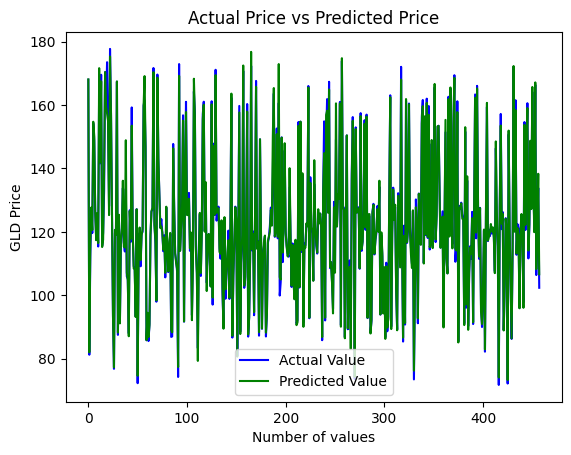

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()